In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [ ]:
df = pd.read_csv("1976-2016-president.csv")
print(df.head(3))
print(df.tail(3))

   year    state state_po  ...  totalvotes   version  notes
0  1976  Alabama       AL  ...     1182850  20171015    NaN
1  1976  Alabama       AL  ...     1182850  20171015    NaN
2  1976  Alabama       AL  ...     1182850  20171015    NaN

[3 rows x 14 columns]
      year    state state_po  ...  totalvotes   version  notes
3737  2016  Wyoming       WY  ...      258788  20171015    NaN
3738  2016  Wyoming       WY  ...      258788  20171015    NaN
3739  2016  Wyoming       WY  ...      258788  20171015    NaN

[3 rows x 14 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


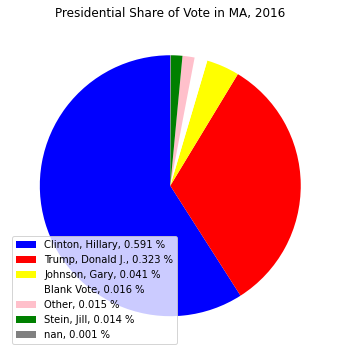

In [143]:
# Create pie chart that shows for a particular state in a particular year, shows share of vote totals
import matplotlib.pyplot as plt

# Let's choose Massachusetts
df_pie_chart = df[(df["year"] == 2016) & (df["state"] == "Massachusetts")]
# Create voteshare column
df_pie_chart['Voteshare'] = df_pie_chart['candidatevotes'] / df_pie_chart['totalvotes']

fig1, ax1 = plt.subplots(figsize=(10, 6)) # create plot size
labels = df_pie_chart['candidate'] #create candidate labels
sizes = df_pie_chart['Voteshare'] #create vote size label
colors = ['blue', 'red', 'yellow', 'white', 'pink', 'green', 'grey'] #create colors
ax1.pie(sizes, startangle=90, colors = colors) # plot voteshare data, at 90 orientation, colors
plt.title("Presidential Share of Vote in MA, 2016") # title

# for each item, percent s in python is a way to insert a variable and insert a string, %s insert the name, calculates percentage, %% actually shows percent symbol. 
# for l, s in zip. l is refering to each label and s is referring to each size 

# create legend, use for loop to do this. %s in python is a way to inserts string, #1.3f formats percentage. l is label, s is size. Zip combines together. 
# So for for each item, creates legend formatted

plt.legend(labels=['%s, %1.3f %%' % (l, s) for l, s in zip(labels, sizes)]) 

# show plot
plt.show()



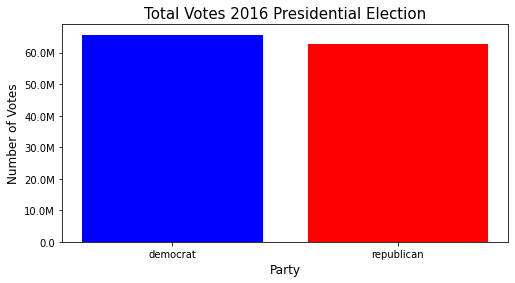

In [145]:
# Create bar chart that shows 

# create dataframe that includes just the data for 2016
df_votes = df[(df["year"] == 2016)]

# use df.loc to create a pivot table for votes 
data = df_votes.loc[(df_votes['party'] == "democrat") | (df['party'] == "republican")]
table = pd.pivot_table(data=data,index='party',values='candidatevotes',aggfunc=np.sum)

# create plot size
fig, ax = plt.subplots(figsize=(8, 4))

# plot bar from the pivot table, add colors
plt.bar(table.index, table['candidatevotes'], color=['blue', 'red'])

#x-axis labels 
plt.xlabel('Party', fontsize = 12) 

#y-axis labels 
plt.ylabel('Number of Votes', fontsize = 12) 

#plot title 
plt.title('Total Votes 2016 Presidential Election', fontsize = 15) 

# derived from https://flynn.gg/blog/better-matplotlib-charts/
# Format numbers on y axis to show in millions

from matplotlib.ticker import FuncFormatter

def number_formatter(number, pos=None):
    """Convert a number into a human readable format."""
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000.0
    return '%.1f%s' % (number, ['', 'K', 'M', 'B', 'T', 'Q'][magnitude])

ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))

# plot show

plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


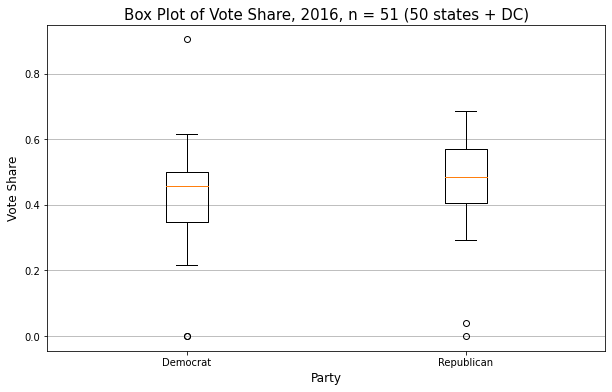

In [144]:
# Create box plot to compare the democrat verses republic state voter share values in 2016 
# create dataframes
df_bplot_dem = df[(df["year"] == 2016) & (df["party"] == "democrat")]
df_bplot_dem['Voteshare'] = df_bplot_dem['candidatevotes'] / df_bplot_dem['totalvotes']
df_bplot_rep = df[(df["year"] == 2016) & (df["party"] == "republican")]
df_bplot_rep['Voteshare'] = df_bplot_rep['candidatevotes'] / df_bplot_rep['totalvotes']

#define data
x1 = df_bplot_dem['Voteshare']
x2 = df_bplot_rep['Voteshare']
data = [x1, x2]
# create figure size
fig, ax = plt.subplots(figsize=(10, 6))
# build a box plot
ax.boxplot(data)
# title and axis labels
ax.set_title('Box Plot of Vote Share, 2016, n = 51 (50 states + DC)', fontsize = 15)
ax.set_ylabel('Vote Share', fontsize = 12)
ax.set_xlabel('Party', fontsize = 12)
# add horizontal grid lines
ax.yaxis.grid(True)
labels = ('Democrat', 'Republican')
plt.xticks(np.arange(len(labels))+1,labels)
# show the plot
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


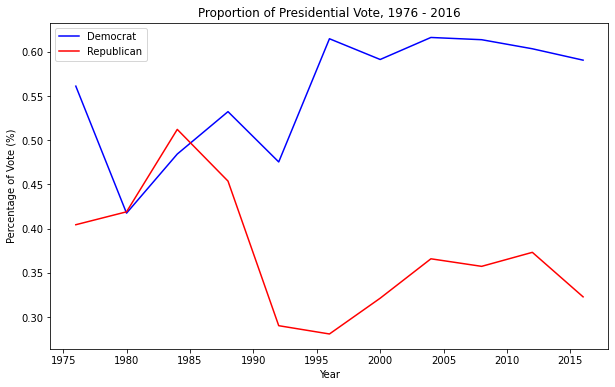

In [139]:
# Create line plot of total votes from 1976 - 2016
# create dataframes
df_line_dem = df[(df["state"] == 'Massachusetts') & (df["party"] == "democrat")]
df_line_dem['Voteshare'] = df_line_dem['candidatevotes'] / df_line_dem['totalvotes']
df_line_rep = df[(df["state"] == 'Massachusetts') & (df["party"] == "republican")]
df_line_rep['Voteshare'] = df_line_rep['candidatevotes'] / df_line_rep['totalvotes']

# define plot size
fig, ax = plt.subplots(figsize=(10, 6))
# create x and y for dem line
x1 = df_line_dem['year']
y1 = df_line_dem['Voteshare']
# create x and y for rep line
x2 = df_line_rep['year']
y2 = df_line_rep['Voteshare']
#plot each line
plt.plot(x1, y1, label = "Democrat", color = "blue")
plt.plot(x2, y2, label = "Republican", color = "red")
# x axis label
plt.xlabel('Year')
# y axis labl
plt.ylabel('Percentage of Vote (%)')
# title
plt.title('Proportion of Presidential Vote, 1976 - 2016')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


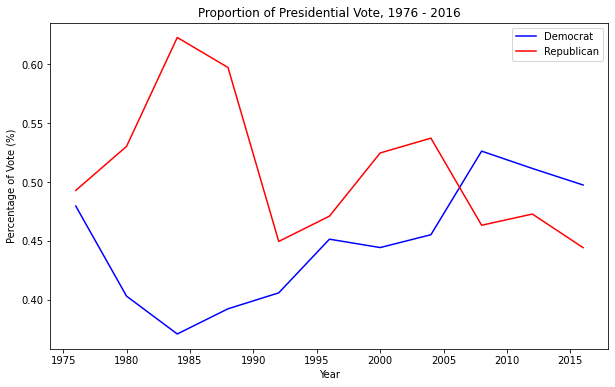

In [140]:
# Create time series chart of total votes from 1976 - 2016
import matplotlib.pyplot as plt

df_line_dem = df[(df["state"] == 'Virginia') & (df["party"] == "democrat")]
df_line_dem['Voteshare'] = df_line_dem['candidatevotes'] / df_line_dem['totalvotes']
df_line_rep = df[(df["state"] == 'Virginia') & (df["party"] == "republican")]
df_line_rep['Voteshare'] = df_line_rep['candidatevotes'] / df_line_rep['totalvotes']

fig, ax = plt.subplots(figsize=(10, 6))
x1 = df_line_dem['year']
y1 = df_line_dem['Voteshare']

x2 = df_line_rep['year']
y2 = df_line_rep['Voteshare']

plt.plot(x1, y1, label = "Democrat", color = "blue")
plt.plot(x2, y2, label = "Republican", color = "red")
plt.xlabel('Year')
colors = ('blue', 'red')
# Set the y axis label of the current axis.
plt.ylabel('Percentage of Vote (%)')
# Set a title of the current axes.
plt.title('Proportion of Presidential Vote, 1976 - 2016')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()
